# Deep Q learning
Jesse Clark 

In [230]:
%qtconsole
%matplotlib inline

In [222]:
import RL_Functions as Functions
import GameEnv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## Some parameters 

### Warehouse/game

In [223]:
parameters = defaultdict(lambda: [])
# x dimension in pixels
parameters['nx'] = 17#32#17#32#17
# y dimension
parameters['ny'] = 11#18#11*2
# number of previous frames to use for s
parameters['n_frames'] = 4
# number of items to collect per player
parameters['n_items'] = 5#*2
# number of players
parameters['n_players'] = 2#3
# number of allowed actions (up,down,left,right)
parameters['n_actions'] = 4

# a list of cords for the obstacle locations [[y1,x1],[y2,x2]...]
parameters['wall_loc'] = []

### Q network

In [224]:
# we use a seperate channel for the game (3 in total) - can also map to a single frame
parameters['img_channels'] = parameters['n_frames']*3
# number of conv filters layer 1
parameters['n_conv_filt1'] = 32
# number of conv filters layer 2
parameters['n_conv_filt2'] = 64
# number of conv filters layer 3
parameters['n_conv_filt3'] = 64
# number units in dense layer
parameters['n_dense1'] = 512

parameters['opt_loss'] = 'mse'
# learning rate
parameters['learning_rate'] = .001

### Create Q network

In [225]:
model = Functions.create_model(parameters['img_channels'], parameters['ny'], parameters['nx'],n_conv1=parameters['n_conv_filt1'],
                               n_conv2 = parameters['n_conv_filt2'], n_conv3=parameters['n_conv_filt3'], n_out1=parameters['n_dense1'],
                               lr=parameters['learning_rate'], n_actions=parameters['n_actions'], loss=parameters['opt_loss'] )

In [ ]:
# altertanatively load an existing model
#model_l = Functions.load_model('/the_name_of_a_saved_model', loss=parameters['opt_loss'], optimizer='adam')
# maybe transfer part of the model from model_l to model
# model = Functions.transfer_conv_weights(model_l, model)
#

In [226]:
# store the network and copies for the target and best 
parameters['model'] = model
parameters['model_target'] = Functions.create_duplicate_model(model)
parameters['model_best'] = Functions.create_duplicate_model(model)

### Other parameters

In [ ]:
# store the replay memory and model loss
parameters['replay'] = []
parameters['loss'] = []

In [285]:
# term conditions
# max moves before terminating a game
parameters['max_moves'] = 300

# use DDQ
parameters['dqn'] = True

# number of frames to observe before training
parameters['observe'] = 10000

# initial epsilon - explore vs exploit
parameters['epsilon'] = 1.0

# lowest epsilon - also use this for playing
parameters['epsilon_min'] = .05

# when to stop annealing epsilon - after this many games
parameters['epsilon_stop'] = 2000

# batch size of previous frames
parameters['batch_size'] = 32

# how many past experiences to store
parameters['replay_buffer'] = 28000

# number of games to play
parameters['n_games'] = 250

# how many frames between updating target network
parameters['update_target'] = 250

# should the game terminate with a collision? will only terminate with max_moves when False
parameters['term_on_collision'] = False

## Now we train by playing

In [ ]:
# should be able to get good results after ~ 1000 games with default params and reasonable after a couple hundred
parameters = Functions.train(parameters)

Game #: 41
Moves this round 300
Items collected 4
none
Loss 0.00649156887084
Avg. items 2.5
Avg. score 0.25
Epsilon 0.979


## Play a game
The output of the game is stored in ```parameters[played_frames]```.

In [284]:
parameters = Functions.play(parameters)

Moves this round 111
Items collected 7
repeated actions
Finished


### Output the game as images

In [270]:
parameters['images_dir'] = 'images/'
GameEnv.output_sequence_RGB(parameters['played_frames'], parameters['images_dir'], n_players = parameters['n_players'])

## Save the model

In [210]:
m_name = 'models/model_%s' % parameters['nx']+'_%s' % parameters['ny'] +'_np%s' %parameters['n_players'] +'_%.2f'%parameters['best_score']
Functions.save_model(parameters['model_best'],m_name)

[WARNING] /Users/jesseclark/Documents/BlogPost/code/models/model_17_11_np2 1.00.h5 already exists - overwrite? [y/n]n


## Plot some stuff

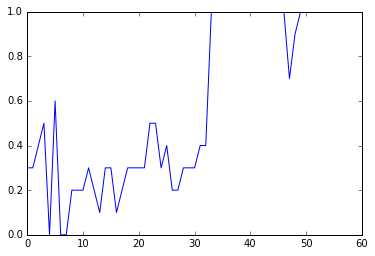

In [216]:
# plot the score (normalized items collected)
plt.plot(parameters['norm_items_collected'])

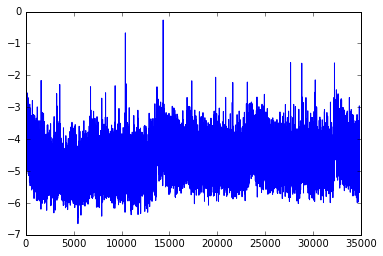

In [219]:
# plot model loss
plt.plot(np.log(parameters['loss']))